# Stochastic Approximation Simulations

It is difficult to compare stochastic approximation algorithms.  The following interactive example shows the behavior of several algorithms under a variety of different conditions for a linear regression model.  You'll notice there is no universal "winner", although some methods are more robust to the learning rate than others.

## Singleton Objective Function

$$f_t(\beta) = \frac{1}{2}(y_t - x_t^T\beta)^2$$

$$g_t = \nabla f_t(\beta) = -(y_t - x_t^T\beta)x_t$$

## Conditions

- Each algorithm uses a learning rate paramerized as 

$$\gamma_t = \frac{1}{t^r},\quad r\in\{.5, .7, .9\}$$.

- The data is generated from a linear model:

    $$y_t = x_t^T\beta + \epsilon_t,$$

    where:
    - $\epsilon_t\sim N(0, \sigma), \quad \sigma \in \{1, 5, 20, 50\}$
    - $\beta$ is one of the following:
        - $(-1,\ldots,1)$
        - $(1,\ldots,1)$
        - $(10,\ldots,10)$
        
## The Visualization

What is being plotted below is the value of the **population objective**

$$f(\beta) = \frac{1}{n}\sum_t f_t(\beta),$$

relative to the OLS solution, evaluated at the current estimate $\hat{\beta}^{(t)}_{SGD}$, $\hat{\beta}^{(t)}_{ADAGRAD},$ etc.  For example, the SGD line above a point $t$ on the x-axis represents

$$f(\beta^{(t)}_{SGD}) - f(\hat\beta_{OLS}).$$

Since the values are relative to the *best* solution, as the lines approach zero they approach the optimum of the population objective function.

In [5]:
using OnlineStats, Interact, Plots
gr(fmt=:png)

Losses = [L1DistLoss(), .5L2DistLoss(), LogitMarginLoss()]
Algs = [SGD(), ADAGRAD(), RMSPROP(), ADAM(), ADAMAX(), OMAS(), OMAP(), MSPI()]
σs = 1:50
βs = [linspace(-1,1,10), ones(10), fill(10.0, 10)]

3-element Array{AbstractArray{Float64,1},1}:
 -1.0:0.2222222222222222:1.0                                 
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]          
 [10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]

(div
  Widgets.Widget{:slider}(DataStructures.OrderedDict{Symbol,Any}(:changes=>Observables.Observable{Int64}("ob_31", 0, Any[WebIO.SyncCallback(WebIO.Scope("knockout-component-01dc15e4-da04-4459-b36e-776c11684c1e", WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["σ"], Dict{Symbol,Any}(Pair{Symbol,Any}(:className, "interact "),Pair{Symbol,Any}(:style, Dict{Any,Any}(Pair{Any,Any}(:padding, "5px 10px 0px 10px")))), 1)], Dict{Any,Any}(Pair{Any,Any}(:attributes, Dict("style"=>"text-align:right;width:18%"))), 2), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Any,Any}(Pair{Any,Any}(:max, 50),Pair{Any,Any}(:style, Dict{Any,Any}()),Pair{Any,Any}(:attributes, Dict{Any,Any}(Pair{Any,Any}(:type, "range"),Pair{Any,Any}(Symbol("data-bind"), "numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}"))),Pair{Any,Any}(:step, 1),Pair{Any,Any}(:className, "slider slider is-fullwidth"),Pair{Any,Any}(:min, 1)), 0)], Dict{Any,Any}(Pair{Any,Any}(:attributes, Dict("style"=>"flex-grow:1; margin: 0 2%"))), 1), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("data-bind"=>"text: displayedvalue"))), 0)], Dict{Any,Any}(Pair{Any,Any}(:attributes, Dict("style"=>"width:18%"))), 1)], Dict{Any,Any}(Pair{Any,Any}(:attributes, Dict("style"=>"display:flex; justify-content:center; align-items:center;"))), 7), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("changes", (Observables.Observable{Int64}(#= circular reference @-7 =#), nothing)),Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("value", (Observables.Observable{Int64}("ob_30", 25, Any[WebIO.SyncCallback(WebIO.Scope(#= circular reference @-7 =#), WebIO.SyncCallback(WebIO.Scope(#= circular reference @-8 =#), WebIO.#37)), Observables.g]), nothing))), Set{String}(), nothing, Any["knockout"=>"/Users/joshday/.julia/v0.6/Knockout/src/../assets/knockout.js", "knockout_punches"=>"/Users/joshday/.julia/v0.6/Knockout/src/../assets/knockout_punches.js", "/Users/joshday/.julia/v0.6/InteractBase/src/../assets/all.js", "/Users/joshday/.julia/v0.6/InteractBase/src/../assets/style.css", "/Users/joshday/.julia/v0.6/InteractBulma/src/../assets/main.css"], Dict{Any,Any}(Pair{Any,Any}("_promises", Dict{Any,Any}(Pair{Any,Any}("importsLoaded", Any[WebIO.JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":25}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        [this[\"displayedvalue\"]=ko.computed(function () {return this.value();},this)]\n        [this[\"chan
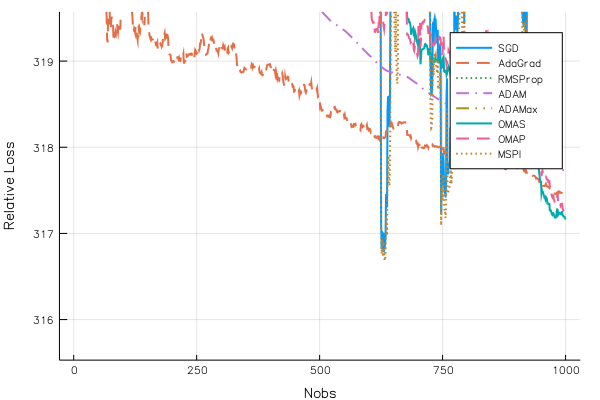
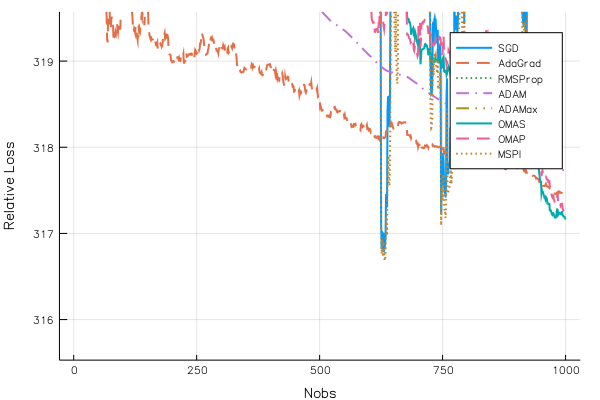

In [6]:
srand(321)
n, p = 1000, 10
x = randn(n, p)

@manipulate for σ in σs, β in βs, r in .5:.02:1
    srand(123)
    y = x * β + σ * randn(n)
    out = zeros(n, 8)
    s = Series(StatLearn.(p, Algs, NoPenalty(), rate=LearningRate(r))...)
    for i in 1:n
        xi = @view x[i, :]
        yi = y[i]
        fit!(s, (xi, yi))
        for j in 1:8
            out[i, j] = OnlineStats.objective(s.stats[j], x, y)
        end
    end
    ymin = mean(abs2, y - x * (x\y)) / 2
    ymax = mean(abs2, y .- 0) / 2
    plot(out, label = [:SGD :AdaGrad :RMSProp :ADAM :ADAMax :OMAS :OMAP :MSPI], 
        ylim = (ymin, ymax), linestyle = :auto, w=2, 
        ylab="Relative Loss", xlab="Nobs"
        )
end

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>